In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cp /content/drive/MyDrive/CSVs/* ./

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [9]:
from pandas_datareader import data as pdr
from datetime import datetime

In [62]:
df = pd.read_csv('/content/Google_stock.csv')

In [63]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,1062.989990,1033.040039,1057.829956,1044.959961,1655500,1044.959961
1,2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2,2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
3,2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
4,2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044


In [64]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400,1344.430054
249,2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100,1362.469971
250,2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600,1354.640015
251,2019-12-30,1357.000000,1337.839966,1356.810059,1339.709961,999700,1339.709961
252,2019-12-31,1340.660034,1332.130005,1335.790039,1339.390015,975700,1339.390015


In [65]:
close = df['Close']
print(close)

0      1044.959961
1      1054.680054
2      1025.469971
3      1078.069946
4      1075.920044
          ...     
248    1344.430054
249    1362.469971
250    1354.640015
251    1339.709961
252    1339.390015
Name: Close, Length: 253, dtype: float64


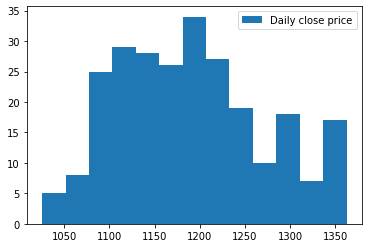

In [66]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

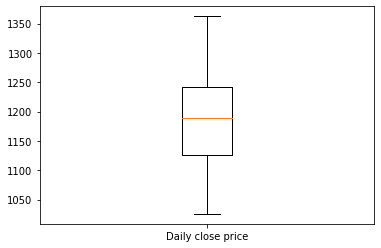

In [67]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

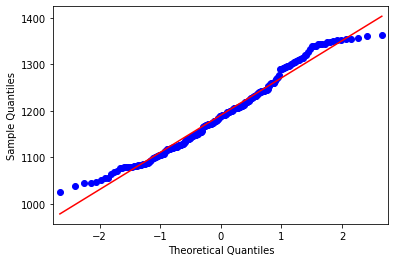

In [68]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [69]:
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))

Mean is:  1190.6388508792922
Standard deviation is:  80.00346720750319
Median is:  1189.4300537109375


In [70]:
print("Skewness of the distribution is: ", stats.skew(close))

Skewness of the distribution is:  0.29059016508890034


In [71]:
print("Skewtest of the distribution is: ", stats.skewtest(close))

Skewtest of the distribution is:  SkewtestResult(statistic=1.9035975334732333, pvalue=0.056962620305662556)


In [72]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))

Kurtosis of the distributionn is:  -0.6545965059562242


In [73]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=-3.0207826239989437, pvalue=0.002521222909454044)


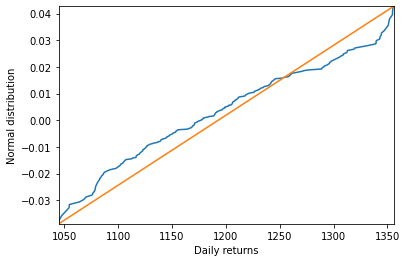

In [74]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

## Daily Return

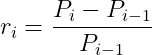

In [75]:
## Daily Return
returns = close.pct_change(1).dropna()
print(returns)

1      0.009302
2     -0.027696
3      0.051294
4     -0.001994
5      0.008783
         ...   
248   -0.004590
249    0.013418
250   -0.005747
251   -0.011021
252   -0.000239
Name: Close, Length: 252, dtype: float64


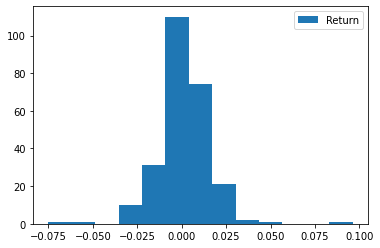

In [76]:
plt.hist(returns, bins="rice", label="Return")
plt.legend()
plt.show()

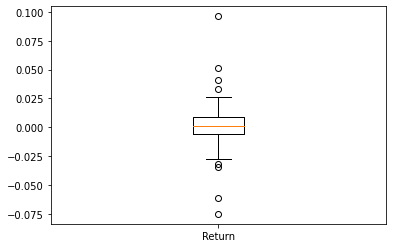

In [77]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

In [78]:
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))

Mean is:  0.0010962322799682742
Standard deviation is:  0.014900208492425428
Median is:  0.0008828280592479976


In [79]:
print("Skewness of the distribution is: ", stats.skew(returns))

Skewness of the distribution is:  0.31382079314355055


In [80]:
print("Skewtest of the distribution is: ", stats.skewtest(returns))

Skewtest of the distribution is:  SkewtestResult(statistic=2.045884134543183, pvalue=0.04076777164885915)


In [81]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))

Kurtosis of the distributionn is:  9.405316676480512


In [82]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=7.381680334517604, pvalue=1.563041170552381e-13)


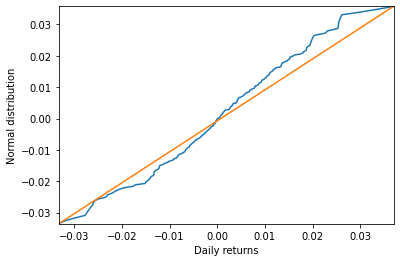

In [83]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

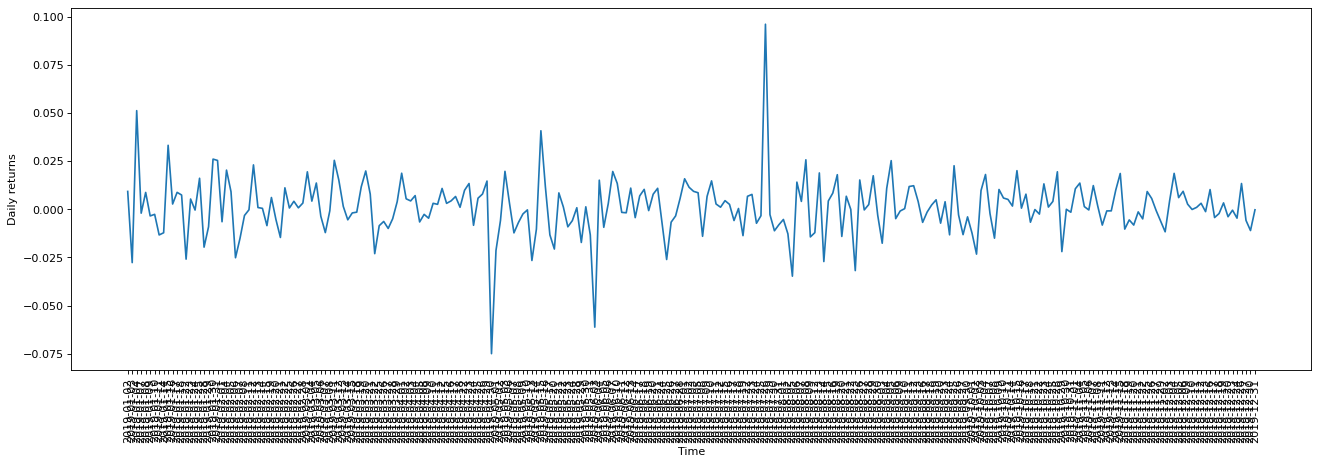

In [84]:
## Volatility of the distribution curve.
## Look at the original time series
plt.figure(figsize=(20, 6), dpi=80)
dates= df["Date"][1:]
data=[[i,j] for i,j in zip(dates,returns)]
plt.plot(dates,returns)
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

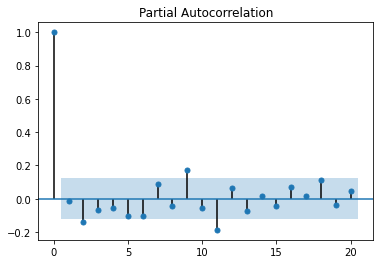

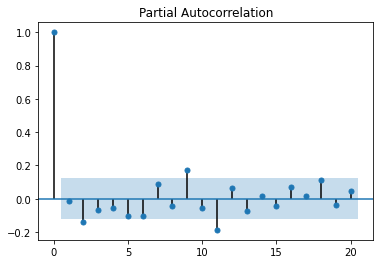

In [85]:
## Auto correlation function
plot_pacf(returns,lags=20)